# Python Pandas

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

Wes Mckinney [Wiki](https://en.wikipedia.org/wiki/Pandas_%28software%29)

Reference [Python Pandas](http://pandas.pydata.org/)

### Topics

1. [Overview Pandas Library](http://pandas.pydata.org/pandas-docs/stable/overview.html)
2. Getting Started - Tutorials
    * [Wes Mckinney 10 Minute tutorial](https://vimeo.com/59324550)
    * [Documention 10 overview](http://pandas.pydata.org/pandas-docs/stable/10min.html)
    * [cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)
3. [Documentation Data IO Tools](http://pandas.pydata.org/pandas-docs/stable/io.html)
4. Oklahoma Mesonet Lesson
    * Fixed Width IO Tool
    * Dataframe
    * Group By Function
    * Agreegation
    * Pickle


## Lesson
This lesson will focus on retrieving data from the Oklahoma Mesonet with an introduction to Data Analysis and Visualization using Pandas.

#### Oklahoma Mesonet Term of Use 

The data used in this example is from the Oklahoma Mesonet. Please review [Term of Use](https://www.mesonet.org/index.php/site/about/terms_of_use) from Oklahoma Mesonet.

#### Oklahoma Mesonet Example 

This function returns a pandas dataframe of weather station data. Example [Oklahoma Mesonet Data url](http://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/20140801nrmn/mts/TEXT/)

### Pandas Read Fixed Width IO Tools

In [89]:
from pandas import read_fwf
#Example url for data
url = "http://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/20140801nrmn/mts/TEXT/"

read_fwf(url,skiprows=2,skipfooter=1,
         widths=[5,6,6,7,7,7,7,6,7,7,7,8,9,6,7,7,7,7,7,7,7,8,8,8],
         na_values=['-999','-998','-997','-996','-995'])


,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,WMAX,RAIN,PRES,SRAD,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
0,NRMN,121,0,78,23.3,4.0,3.9,54,10.6,0.7,6.1,10.67,975.03,289,22.8,3.4,25.1,24.8,25.7,24.9,24.5,1.62,3.7,3.76
1,NRMN,121,5,78,23.2,4.1,4.0,58,9.8,0.8,5.6,0.00,975.00,253,22.8,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NRMN,121,10,78,23.2,4.1,4.1,42,8.6,0.9,5.7,0.00,974.99,234,22.7,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NRMN,121,15,78,23.5,3.5,3.4,45,16.3,0.7,4.9,0.00,975.02,230,23.0,3.0,25.1,24.8,25.6,24.9,24.5,NaN,NaN,NaN
4,NRMN,121,20,77,23.2,4.3,4.3,39,8.3,0.7,5.8,0.00,975.03,259,22.8,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,NRMN,121,1415,57,27.2,3.5,3.3,105,17.9,0.6,5.0,0.00,974.79,334,26.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NRMN,121,1420,57,27.0,3.1,3.0,104,11.3,0.9,4.9,0.00,974.80,308,26.6,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NRMN,121,1425,57,27.2,2.6,2.6,113,14.3,0.6,4.1,0.00,974.87,299,26.7,2.0,27.9,28.0,29.5,25.1,24.1,NaN,NaN,NaN
286,NRMN,121,1430,58,27.0,3.1,3.0,90,11.9,0.6,4.8,0.00,974.91,281,26.6,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data = read_fwf(url,skiprows=2,skipfooter=1,
         widths=[5,6,6,7,7,7,7,6,7,7,7,8,9,6,7,7,7,7,7,7,7,8,8,8],
         na_values=['-999','-998','-997','-996','-995'])

In [91]:
data['TAIR'][:10]

0    23.3
1    23.2
2    23.2
3    23.5
4    23.2
5    23.2
6    23.1
7    23.2
8    23.4
9    23.5
Name: TAIR, dtype: float64

In [92]:
print("Min:",data.TAIR.min())
print("Max:",data.TAIR.max())
print("STD:",data.TAIR.std())

Min: 17.3
Max: 28.6
STD: 3.31992359303


### Group By Function

In [93]:
import numpy as np
grouped = data.groupby(['STID'])
grouped['TAIR'].agg([np.min,np.mean,np.max,np.size])

,amin,mean,amax,size
STID,,,,
NRMN,17.3,22.420139,28.6,288


### Python Datetime Operations 

In [94]:
from datetime import datetime, timedelta
datetime.now()

datetime.datetime(2016, 2, 2, 22, 45, 8, 752844)

In [95]:
start_date = datetime(2010,1,1)
end_date = datetime(2010,4,1)

In [96]:
day_count = (end_date - start_date).days +1 
print(day_count)

91


In [97]:
for single_date in (start_date + timedelta(n) for n in range(day_count-80)):
    print(single_date.year,single_date.month,single_date.strftime('%Y%m%d'))

2010 1 20100101
2010 1 20100102
2010 1 20100103
2010 1 20100104
2010 1 20100105
2010 1 20100106
2010 1 20100107
2010 1 20100108
2010 1 20100109
2010 1 20100110
2010 1 20100111


### Pickle

“Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [98]:
data

,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,WMAX,RAIN,PRES,SRAD,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
0,NRMN,121,0,78,23.3,4.0,3.9,54,10.6,0.7,6.1,10.67,975.03,289,22.8,3.4,25.1,24.8,25.7,24.9,24.5,1.62,3.7,3.76
1,NRMN,121,5,78,23.2,4.1,4.0,58,9.8,0.8,5.6,0.00,975.00,253,22.8,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NRMN,121,10,78,23.2,4.1,4.1,42,8.6,0.9,5.7,0.00,974.99,234,22.7,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NRMN,121,15,78,23.5,3.5,3.4,45,16.3,0.7,4.9,0.00,975.02,230,23.0,3.0,25.1,24.8,25.6,24.9,24.5,NaN,NaN,NaN
4,NRMN,121,20,77,23.2,4.3,4.3,39,8.3,0.7,5.8,0.00,975.03,259,22.8,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,NRMN,121,1415,57,27.2,3.5,3.3,105,17.9,0.6,5.0,0.00,974.79,334,26.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NRMN,121,1420,57,27.0,3.1,3.0,104,11.3,0.9,4.9,0.00,974.80,308,26.6,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NRMN,121,1425,57,27.2,2.6,2.6,113,14.3,0.6,4.1,0.00,974.87,299,26.7,2.0,27.9,28.0,29.5,25.1,24.1,NaN,NaN,NaN
286,NRMN,121,1430,58,27.0,3.1,3.0,90,11.9,0.6,4.8,0.00,974.91,281,26.6,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data.to_pickle('test.p')

In [100]:
from pandas import read_pickle
test = read_pickle('test.p')

In [101]:
test

,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,WMAX,RAIN,PRES,SRAD,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
0,NRMN,121,0,78,23.3,4.0,3.9,54,10.6,0.7,6.1,10.67,975.03,289,22.8,3.4,25.1,24.8,25.7,24.9,24.5,1.62,3.7,3.76
1,NRMN,121,5,78,23.2,4.1,4.0,58,9.8,0.8,5.6,0.00,975.00,253,22.8,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NRMN,121,10,78,23.2,4.1,4.1,42,8.6,0.9,5.7,0.00,974.99,234,22.7,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NRMN,121,15,78,23.5,3.5,3.4,45,16.3,0.7,4.9,0.00,975.02,230,23.0,3.0,25.1,24.8,25.6,24.9,24.5,NaN,NaN,NaN
4,NRMN,121,20,77,23.2,4.3,4.3,39,8.3,0.7,5.8,0.00,975.03,259,22.8,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,NRMN,121,1415,57,27.2,3.5,3.3,105,17.9,0.6,5.0,0.00,974.79,334,26.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NRMN,121,1420,57,27.0,3.1,3.0,104,11.3,0.9,4.9,0.00,974.80,308,26.6,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NRMN,121,1425,57,27.2,2.6,2.6,113,14.3,0.6,4.1,0.00,974.87,299,26.7,2.0,27.9,28.0,29.5,25.1,24.1,NaN,NaN,NaN
286,NRMN,121,1430,58,27.0,3.1,3.0,90,11.9,0.6,4.8,0.00,974.91,281,26.6,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Loading Multiple Days


In [35]:
from pandas import read_fwf, concat, options, read_pickle
from datetime import datetime, timedelta
import numpy as np
import os

#Create Mesonet Cache Directory
if not os.path.exists('mesonet_cache'):
    os.makedirs('mesonet_cache')

local_data_cache = 'mesonet_cache/{0}{1}.p'

def get_mesonet_dataframe(start_date,end_date,site):
    url_template = "http://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/{0}{1}/mts/TEXT/"
    day_count = (end_date - start_date).days +1
    df_pieces=[]
    for single_date in (start_date + timedelta(n) for n in range(day_count)):
        picklefile = local_data_cache.format(single_date.strftime('%Y%m%d'),site)
        if os.path.isfile(picklefile):
            df = read_pickle(picklefile)
        else:
            url = url_template.format(single_date.strftime('%Y%m%d'),site)
            df = read_fwf(url,header=2,
                          widths=[5,6,6,7,7,7,7,6,7,7,7,8,9,6,7,7,7,7,7,7,7,8,8,8],
                          na_values=['-999','-998','-997','-996','-995'],
                          skipfooter=1)
            df["DATE"]=single_date.date()
            df.to_pickle(picklefile)
        df_pieces.append(df)
    return concat(df_pieces)

### Retrieve Data

In [75]:
site="nrmn" #Norman Mesonet site
start_date = datetime(2010,1,1)
end_date = datetime(2010,4,1)
df = get_mesonet_dataframe(start_date,end_date,site)
df.shape

(26208, 25)

### Pandas Groupby 

In [107]:
# Groupby Site ID and Date and find the daily min, max, mean air temperature ('TAIR')
grouped =df.groupby(['STID','DATE'])
grouped['TAIR'].agg([np.min,np.mean,np.max,np.size])

amin       mean  amax  size
STID DATE                                   
NRMN 2010-01-01  -7.9  -1.886458   8.0   288
     2010-01-02  -8.0  -3.165278   3.7   288
     2010-01-03  -4.8  -3.017014  -0.3   288
     2010-01-04  -6.9  -4.559375  -0.8   288
     2010-01-05  -4.5  -2.856250  -0.6   288
     2010-01-06  -6.0  -1.092708   6.7   288
     2010-01-07 -10.9  -6.197917   1.7   288
     2010-01-08 -14.3 -10.399306  -5.6   288
     2010-01-09 -14.4  -9.454514  -2.6   288
     2010-01-10 -13.6  -6.570139   5.2   288
...               ...        ...   ...   ...
     2010-03-23   6.7  13.761111  24.3   288
     2010-03-24  13.1  15.983681  21.3   288
     2010-03-25   6.8  10.510069  16.0   288
     2010-03-26   1.6  10.058681  18.9   288
     2010-03-27   6.9  11.913889  16.0   288
     2010-03-28   5.7   9.421181  15.5   288
     2010-03-29   1.3  11.223958  22.6   288
     2010-03-30  10.5  17.526042  27.0   288
     2010-03-31  15.1  21.620486  30.4   288
     2010-04-01  16.0  21.161111  27.5   288

[91 rows x 4 columns]

In [72]:
% matplotlib inline

In [73]:
import matplotlib
matplotlib.style.use('ggplot')

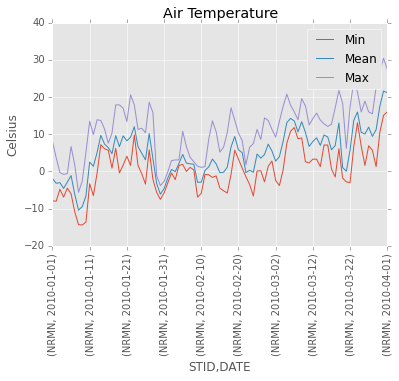

In [83]:
#TAIR Plot Min Mean Max

#Min
grp = grouped['TAIR'].min()
ax1=grp.plot(rot=90)
#Mean
grp = grouped['TAIR'].mean()
ax2=grp.plot(rot=90)
#Max 
grp = grouped['TAIR'].max()
ax3=grp.plot(rot=90,title="Air Temperature")

#Add Custom Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

my_labels = ['Min','Mean','Max']
ax1.legend(lines1 + lines2 + lines3,my_labels)
ax1.set_ylabel("Celsius")


### Adjust the Pandas Display Options
The display shows some useful information, but not able to see table dataset. Let's fix that with setting the max display columns and display rows. 

In [106]:
# Set Pandas Display max column and rows 
# options was imported from the pandas library 
options.display.max_columns = 10
options.display.max_rows = 20
# Groupby Site ID and Date
grouped['TAIR'].agg(['min','mean','max','std','size'])

min       mean   max       std  size
STID DATE                                             
NRMN 2010-01-01  -7.9  -1.886458   8.0  5.317277   288
     2010-01-02  -8.0  -3.165278   3.7  3.606157   288
     2010-01-03  -4.8  -3.017014  -0.3  1.113563   288
     2010-01-04  -6.9  -4.559375  -0.8  1.850807   288
     2010-01-05  -4.5  -2.856250  -0.6  1.175014   288
     2010-01-06  -6.0  -1.092708   6.7  3.996782   288
     2010-01-07 -10.9  -6.197917   1.7  3.425910   288
     2010-01-08 -14.3 -10.399306  -5.6  2.540597   288
     2010-01-09 -14.4  -9.454514  -2.6  3.707800   288
     2010-01-10 -13.6  -6.570139   5.2  6.474260   288
...               ...        ...   ...       ...   ...
     2010-03-23   6.7  13.761111  24.3  6.045036   288
     2010-03-24  13.1  15.983681  21.3  1.617751   288
     2010-03-25   6.8  10.510069  16.0  2.987780   288
     2010-03-26   1.6  10.058681  18.9  5.116203   288
     2010-03-27   6.9  11.913889  16.0  2.369555   288
     2010-03-28   5.7   9.421181  15.5  3.014484   288
     2010-03-29   1.3  11.223958  22.6  7.560129   288
     2010-03-30  10.5  17.526042  27.0  5.782159   288
     2010-03-31  15.1  21.620486  30.4  4.885707   288
     2010-04-01  16.0  21.161111  27.5  3.213584   288

[91 rows x 5 columns]

### Group By Date.Year and Date.Month

In [60]:
grouped = df.groupby(['STID',df['DATE'].map(lambda x: x.year) ,df['DATE'].map(lambda x: x.month),])
grouped['TAIR'].agg(['min','mean','max','std','size'])

min       mean   max       std  size
STID DATE DATE                                       
NRMN 2010 1    -14.4   1.863351  20.6  7.414409  8928
          2     -6.9   2.147049  17.1  4.321797  8064
          3     -3.8   9.690995  30.4  6.233062  8928
          4     16.0  21.161111  27.5  3.213584   288

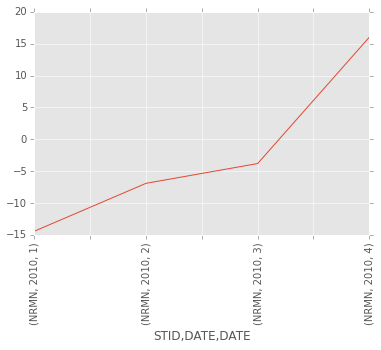

In [64]:
grp1 = grouped['TAIR'].min()
grp1.plot(x='DATE',rot=90)

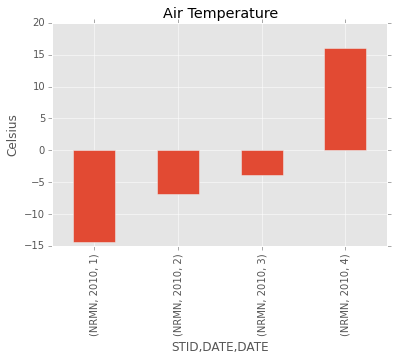

In [69]:
ax = grp1.plot(x='DATE',rot=90,kind='bar',title="Air Temperature")
ax.set_ylabel("Celsius")